# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)
data = pd.DataFrame(data,columns=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_Consumption'])
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,1.415441,-1.181841,-1.038921,-0.825903,-0.323092
1,1.415441,-0.263969,-1.249055,0.030364,-0.476640
2,1.415441,-0.663887,-1.151803,0.176112,-0.142446
3,-0.178923,1.106673,-0.930381,-0.753029,-1.470189
4,0.352532,0.276889,-1.486106,-0.479753,-1.506318


In [3]:
# Coreation Matrix
corr_matrix = data.corr()
corr_matrix

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

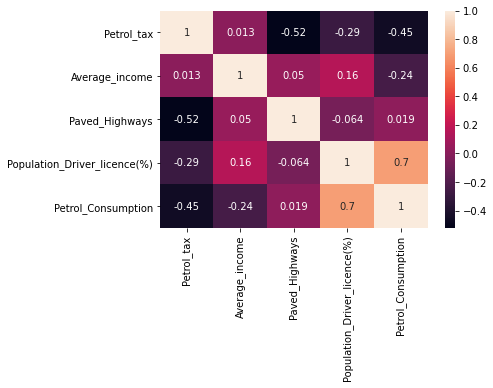

In [4]:
# visualizing corelation matrix using heatmap
import seaborn as sn
sn.heatmap(corr_matrix,annot = True)

In [5]:
# Dividing data in training and testing data
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state = 100)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred_train = model.predict(x_train)
np.set_printoptions(precision = 2)
y_pred_train

array([-0.41, -1.28,  0.74,  0.27, -0.08,  1.32,  0.46, -0.88, -0.57,
        1.  , -0.35,  0.88, -0.18, -0.06, -0.23, -0.42, -0.18,  1.29,
       -1.54, -0.86, -0.24,  0.37,  0.21,  0.6 ,  0.83,  0.64,  0.54,
        1.1 ,  0.02, -0.52,  0.03, -0.69,  0.25, -1.06,  1.36, -0.81,
       -0.68, -0.8 ])

In [9]:
y_pred_test = model.predict(x_test)
y_pred_test

array([-2.4 , -0.16,  0.81,  0.21,  0.6 , -0.15, -1.48,  0.74,  1.66,
        0.2 ])

In [10]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.6216711288122228

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.7970900788670919